In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [18]:
df = pd.read_csv('spambase.csv', header = 0)
print(len(df.axes[0]))
print(len(df.axes[1]))
df.head()
print(df.columns)

4600
58
Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38',
       '0.39', '0.40', '0.41', '0.42', '0.43', '0.778', '0.44', '0.45',
       '3.756', '61', '278', '1'],
      dtype='object')


In [19]:
# remove duplicates and verify
df = df.drop_duplicates()
df[df.duplicated()]

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1


In [20]:
# check for null values
df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.43      0
0.778     0
0.44      0
0.45      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [23]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(4209, 58)
(4209, 2)


Text(0, 0.5, 'Second Principal component')

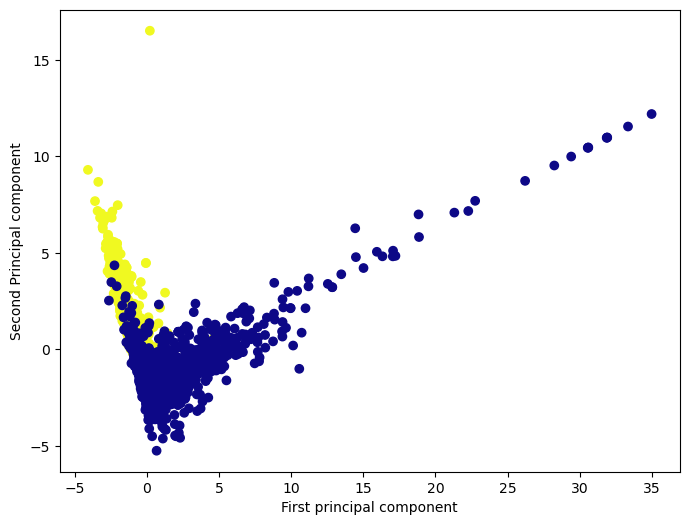

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['1'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal component')

In [25]:
pca.components_

array([[-0.05219503, -0.02528297, -0.05858479, -0.00825395, -0.04905448,
        -0.05784458, -0.06569636, -0.04732125, -0.06172749, -0.03208905,
        -0.06926329, -0.0230966 , -0.04628579, -0.02204656, -0.04281176,
        -0.06027442, -0.06425129, -0.03005893, -0.1026151 , -0.04288784,
        -0.1014886 , -0.01895869, -0.07353418, -0.0540817 ,  0.21122737,
         0.20599406,  0.08857364,  0.26515282,  0.20619948,  0.29225573,
         0.29426487,  0.33639388,  0.01318762,  0.33519726,  0.25198491,
         0.30149032,  0.06406026, -0.00040565,  0.04808634,  0.30339103,
         0.01912815,  0.03265457,  0.08063645,  0.01864485,  0.020145  ,
         0.00577467,  0.00525006,  0.00928525,  0.00127837,  0.13063831,
         0.02601077, -0.05885973, -0.07358119, -0.00516757, -0.02551473,
        -0.04370537, -0.05888969, -0.16243285],
       [ 0.11981824,  0.09665122,  0.12559328,  0.01306191,  0.11375013,
         0.13339728,  0.15374923,  0.12522969,  0.19422066,  0.13913551,
   

# Decision Tree

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [27]:
df = pd.read_csv('spambase.csv', header= None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [28]:
X = df.iloc[:, :-1]
Y = df.iloc[:,-1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 1)

In [30]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",max_depth=7)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [31]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,

In [32]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred_en)
print (cm)

[[537  27]
 [ 40 317]]


In [33]:
print ("Accuracy is "), accuracy_score(y_test,y_pred_en)*100

Accuracy is 


(None, 92.72529858849077)

In [34]:
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       564
           1       0.92      0.89      0.90       357

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921

